## InClass

#### import required libraries

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose, STL

#### Read Petrol. csv file

In [64]:
df = pd.read_csv("C:\Datasets\Petrol.csv")

In [65]:
df.head()

,Year,Quarter,Consumption
0,2001,Q1,14.978
1,2001,Q2,11.099
2,2001,Q3,10.057
3,2001,Q4,10.454
4,2002,Q1,9.295


In [66]:
df.tail()

,Year,Quarter,Consumption
46,2012,Q3,0.88818
47,2012,Q4,0.99804
48,2013,Q1,0.84120
49,2013,Q2,0.74032
50,2013,Q3,0.72823


In [49]:
df.dtypes

Year             int64
Quarter         object
Consumption    float64
dtype: object

#### convert the given data into time series

In [68]:
quarters= pd.date_range(start ='2001-03-31', end ='2013-09-30', freq ='Q')

In [69]:
quarters

DatetimeIndex(['2001-03-31', '2001-06-30', '2001-09-30', '2001-12-31',
               '2002-03-31', '2002-06-30', '2002-09-30', '2002-12-31',
               '2003-03-31', '2003-06-30', '2003-09-30', '2003-12-31',
               '2004-03-31', '2004-06-30', '2004-09-30', '2004-12-31',
               '2005-03-31', '2005-06-30', '2005-09-30', '2005-12-31',
               '2006-03-31', '2006-06-30', '2006-09-30', '2006-12-31',
               '2007-03-31', '2007-06-30', '2007-09-30', '2007-12-31',
               '2008-03-31', '2008-06-30', '2008-09-30', '2008-12-31',
               '2009-03-31', '2009-06-30', '2009-09-30', '2009-12-31',
               '2010-03-31', '2010-06-30', '2010-09-30', '2010-12-31',
               '2011-03-31', '2011-06-30', '2011-09-30', '2011-12-31',
               '2012-03-31', '2012-06-30', '2012-09-30', '2012-12-31',
               '2013-03-31', '2013-06-30', '2013-09-30'],
              dtype='datetime64[ns]', freq='Q-DEC')

In [70]:
# Combine 'Year' and 'Quarter' columns to create a new 'Date' column
df['Time_Stamp'] = pd.DataFrame(quarters)

In [71]:
# Set the 'Date' column as the index
df.set_index('Time_Stamp', inplace=True)

In [72]:
# Drop 'Year' and 'Quarter' columns
df.drop(['Year', 'Quarter'], axis=1, inplace=True)

In [73]:
# Display the updated DataFrame
df.head()

,Consumption
Time_Stamp,
2001-03-31,14.978
2001-06-30,11.099
2001-09-30,10.057
2001-12-31,10.454
2002-03-31,9.295


In [74]:
df.tail()

,Consumption
Time_Stamp,
2012-09-30,0.88818
2012-12-31,0.99804
2013-03-31,0.84120
2013-06-30,0.74032
2013-09-30,0.72823


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51 entries, 2001-03-31 to 2013-09-30
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  50 non-null     float64
dtypes: float64(1)
memory usage: 816.0 bytes


#### Plot the time series

<Axes: xlabel='Time_Stamp'>

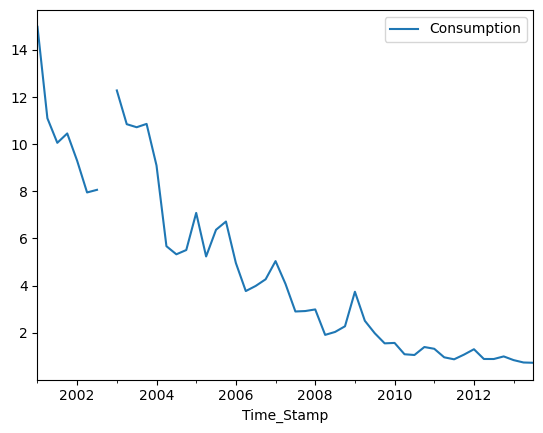

In [76]:
df.plot()

#### fill the missing values using interpolation

In [77]:
# Interpolate missing values
df['Consumption'] = df['Consumption'].interpolate(method='linear')

<Axes: xlabel='Date'>

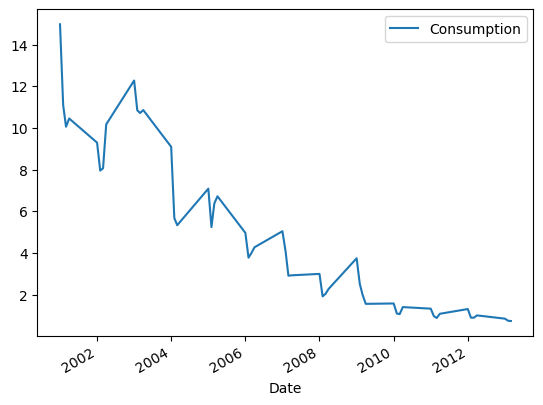

In [15]:
df.plot()

#### decompose the given time series and give your inference on whether the series is additive or multiplicative

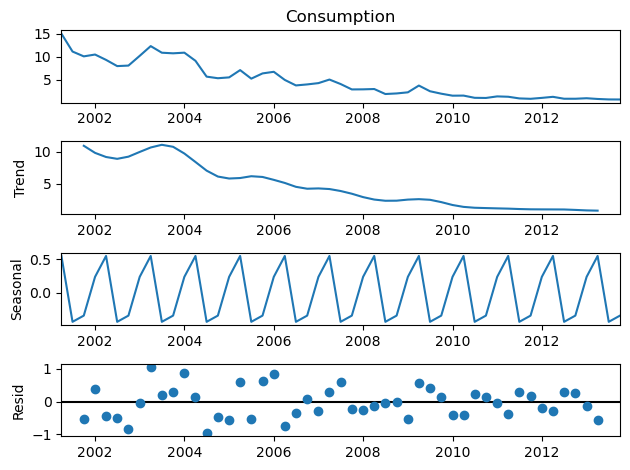

In [79]:
# Perform seasonal decomposition
decomposition = seasonal_decompose(df['Consumption'], model='additive')
decomposition.plot();

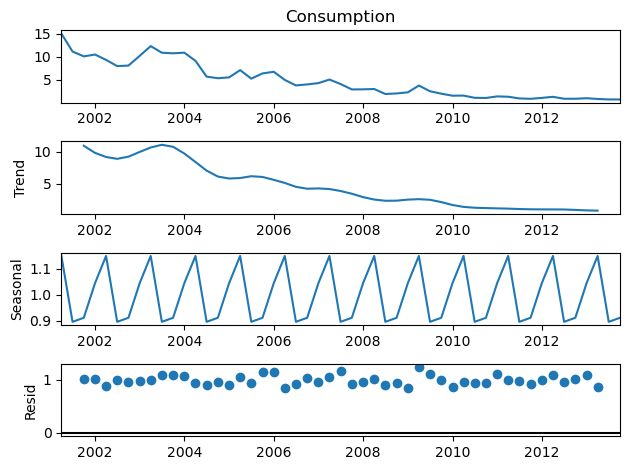

In [80]:
# Perform seasonal decomposition
decomposition = seasonal_decompose(df['Consumption'], model='mulitiplicative')
decomposition.plot();

### Inference on model
The residual values lies between -1 and 1 in additive model and it lies above 0 in multiplicative model.
If the residual values consistently lie above 0, it implies that the fluctuations in the series are better represented by multiplication rather than addition. In other words, the variability in the series increases or decreases over time in a non-linear manner, which is characteristic of a multiplicative decomposition model.

By examining the residual values, we can infer the series is more likely to follow multiplicative decomposition model.